In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

In [2]:
curve_fit_df = pd.read_csv('alpha_values_MaxC_60000_Grad_0.000405_curve_fit.csv')
curve_fit_df.head(10)

,deme,alpha_outliers,alpha,Curve_Fit
0,1.0,5390.0,NaN,15491.724340
1,2.0,3120.0,NaN,13211.283310
2,3.0,6270.0,NaN,11283.390810
3,4.0,7150.0,NaN,9655.528751
4,5.0,5440.0,NaN,8282.154201
5,6.0,7010.0,7010.0,7123.926796
6,7.0,6210.0,6210.0,6147.003270
7,8.0,5430.0,5430.0,5322.394775
8,9.0,4660.0,4660.0,4625.382982
9,10.0,4120.0,4120.0,4034.991049


In [3]:
input_param_df = pd.read_excel('input_parameters.xlsx')
input_param_df.head()

,food_conc,drift_velocity,c_x_df_l_dc,attr_time_roc,Vo_max
0,0.211633,0.068255,0.022403,6.192934e-07,12.521185
1,0.239944,0.077261,0.025359,7.935055e-07,12.521185
2,0.272042,0.087437,0.028699,1.016293e-06,12.521185
3,0.308433,0.098930,0.032471,1.301007e-06,12.521185
4,0.349693,0.111902,0.036729,1.664580e-06,12.521185


In [4]:
Grad = 0.000405 # µm^-1
# Receptor Probability is the component in the exponential function that's a byproduct of the alpha value and the receptor sensitivity.
# "attr_time_roc" is the time rate of change of receptor (attractant from food) protein bound, = input_param_df['drift_velocity'] * Grad * input_param_df['c_x_df_l_dc']
input_param_df['prob_tum_up'] = np.exp(-1.16 - curve_fit_df['Curve_Fit']*input_param_df['attr_time_roc'])
input_param_df['prob_tum_down'] = np.exp(-1.16 + curve_fit_df['Curve_Fit']*input_param_df['attr_time_roc'])
input_param_df.head()

,food_conc,drift_velocity,c_x_df_l_dc,attr_time_roc,Vo_max,prob_tum_up,prob_tum_down
0,0.211633,0.068255,0.022403,6.192934e-07,12.521185,0.310493,0.316508
1,0.239944,0.077261,0.025359,7.935055e-07,12.521185,0.310217,0.316790
2,0.272042,0.087437,0.028699,1.016293e-06,12.521185,0.309912,0.317102
3,0.308433,0.098930,0.032471,1.301007e-06,12.521185,0.309573,0.317449
4,0.349693,0.111902,0.036729,1.664580e-06,12.521185,0.309194,0.317838


In [5]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df['deme']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = curve_fit_df['alpha'],
    mode = 'markers',
    name = 'alpha value points'
)
# The second trace
trace1 = go.Scatter(
    x = x_values,
    y = curve_fit_df.loc[:4, 'alpha_outliers'],
    mode = 'markers',
    name = 'alpha value outliers'
)
# The third trace
trace2 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Curve_Fit'],
    mode = 'lines',
    name = 'polynomial fit'
)

# create the data
data = [trace0, trace1, trace2]  # assign traces to data

# create the layout
layout = go.Layout(
    title = 'Alpha values and polynomial curve fit.  Outliers are where receptor sensitivity is too low that the program cannot calculate exponentially increasing values.'
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [6]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df['deme']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = input_param_df['prob_tum_down'],
    mode = 'lines',
    name = 'probability of tumbling going down gradient'
)
# The second trace
trace1 = go.Scatter(
    x = x_values,
    y = input_param_df['prob_tum_up'],
    mode = 'lines',
    name = 'probability of tumbling going up gradient'
)
# create the data
data = [trace0, trace1]  # assign traces to data

# create the layout
layout = go.Layout(
    title = "probability of tumbling = exp(-d +/- alpha*receptor)"
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [56]:
pos_v_time_df = pd.read_excel('pos_v_time_MaxC_60000_Grad_0.000405_No1.xlsx')
pos_v_time_df2 = pd.read_excel('pos_v_time_MaxC_60000_Grad_0.000405_No2.xlsx')
pos_v_time_df3 = pd.read_excel('pos_v_time_MaxC_60000_Grad_0.000405_No3.xlsx')

In [57]:
pos_v_time_df['drift_velocity'] = 0
for i in pos_v_time_df.index[1:]:
    pos_v_time_df.loc[i, 'drift_velocity'] = pos_v_time_df.loc[i, 'position'] - pos_v_time_df.loc[i-1, 'position'] # divided by (dt = 1s)

pos_v_time_df2['drift_velocity'] = 0
for i in pos_v_time_df2.index[1:]:
    pos_v_time_df2.loc[i, 'drift_velocity'] = pos_v_time_df2.loc[i, 'position'] - pos_v_time_df2.loc[i-1, 'position'] # divided by (dt = 1s)

pos_v_time_df3['drift_velocity'] = 0
for i in pos_v_time_df3.index[1:]:
    pos_v_time_df3.loc[i, 'drift_velocity'] = pos_v_time_df3.loc[i, 'position'] - pos_v_time_df3.loc[i-1, 'position'] # divided by (dt = 1s)

print(f"{pos_v_time_df.describe()}\n{pos_v_time_df2.describe()}\n{pos_v_time_df3.describe()}")

               time      position  drift_velocity
count  26001.000000  26001.000000    26001.000000
mean   13000.000000  13201.983310        1.192554
std     7505.986511  10437.502400        8.185214
min        0.000000      0.000000      -12.521185
25%     6500.000000   3627.910732       -6.593762
50%    13000.000000  10019.291827        2.231642
75%    19500.000000  24915.366197        8.783177
max    26000.000000  31010.756208       12.521185
               time      position  drift_velocity
count  31945.000000  31945.000000    31945.000000
mean   15972.000000   8400.769229        0.979844
std     9221.871511   9532.942836        8.279225
min        0.000000      0.000000      -12.521185
25%     7986.000000   1572.925210       -6.809762
50%    15972.000000   3655.519847        1.742612
75%    23958.000000  12690.874695        8.853815
max    31944.000000  31301.112065       12.521185
               time      position  drift_velocity
count  14555.000000  14555.000000    14555.000000


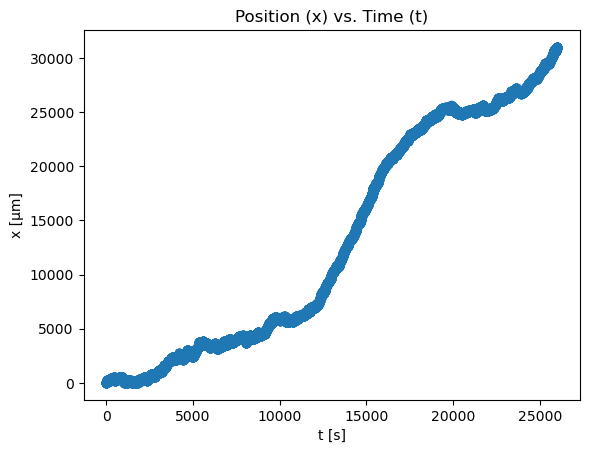

In [8]:
# Check the data to find outliers and to see if the data is normalized.
fig, axes = plt.subplots()
axes.scatter(x=pos_v_time_df['time'], y=pos_v_time_df['position'])
# Customize other aspects of the plot
axes.set_title('Position (x) vs. Time (t)')
axes.set_xlabel('t [s]')
axes.set_ylabel('x [µm]')
plt.show()

12.395973354766323 1019


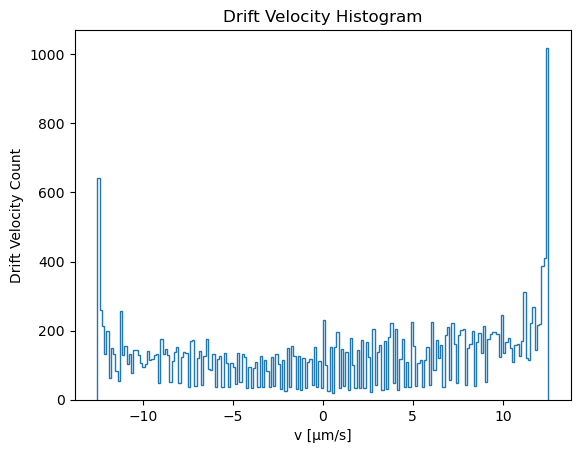

In [51]:
counts, bins = np.histogram(pos_v_time_df['drift_velocity'], bins=200, density=False)
index_val = np.where(counts == max(counts))[0][0]
print(bins[index_val], max(counts))

fig, axes = plt.subplots()
axes.stairs(counts, bins)
# Customize other aspects of the plot
axes.set_title('Drift Velocity Histogram')
axes.set_xlabel('v [µm/s]')
axes.set_ylabel('Drift Velocity Count')
plt.show()

12.395973354767168 1290


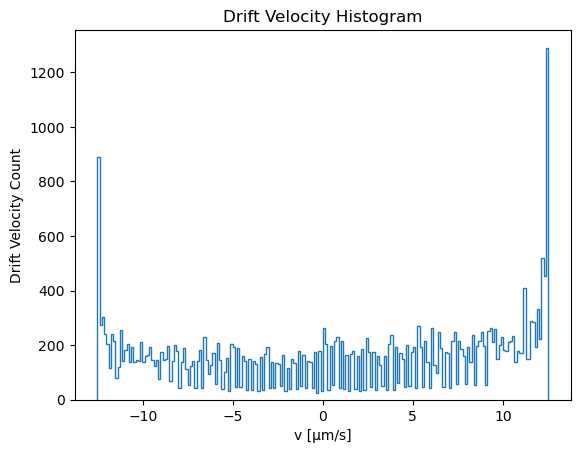

In [50]:
counts, bins = np.histogram(pos_v_time_df2['drift_velocity'], bins=200, density=False)
index_val = np.where(counts == max(counts))[0][0]
print(bins[index_val], max(counts))

fig, axes = plt.subplots()
axes.stairs(counts, bins)
# Customize other aspects of the plot
axes.set_title('Drift Velocity Histogram')
axes.set_xlabel('v [µm/s]')
axes.set_ylabel('Drift Velocity Count')
plt.show()

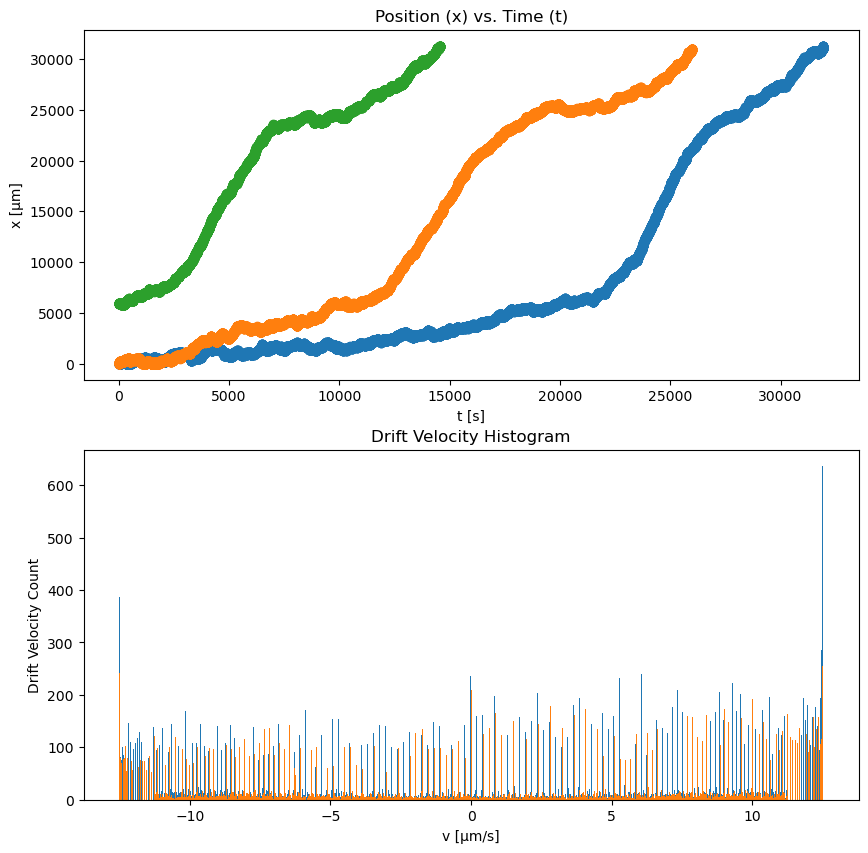

In [58]:
hist_bins = 1000
counts, bins = np.histogram(pos_v_time_df['drift_velocity'], bins=hist_bins, density=False)
counts2, bins2 = np.histogram(pos_v_time_df2['drift_velocity'], bins=hist_bins, density=False)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].scatter(x=pos_v_time_df2['time'], y=pos_v_time_df2['position'])
axes[0].scatter(x=pos_v_time_df['time'], y=pos_v_time_df['position'])
axes[0].scatter(x=pos_v_time_df3['time'], y=pos_v_time_df3['position'])
axes[0].set_title('Position (x) vs. Time (t)')
axes[0].set_xlabel('t [s]')
axes[0].set_ylabel('x [µm]')

axes[1].hist(bins[:-1], bins2, weights=counts2)
axes[1].hist(bins[:-1], bins, weights=counts)

axes[1].set_title('Drift Velocity Histogram')
axes[1].set_xlabel('v [µm/s]')
axes[1].set_ylabel('Drift Velocity Count')
plt.show()

In [61]:
vel = []
for i in pos_v_time_df.index:
    vel.append(0)
    if (i % 500 == 0) and (i > 0):
        del_vel = (pos_v_time_df.loc[i, 'position'] - pos_v_time_df.loc[i-500, 'position'])/500
        vel.append(del_vel)
vel

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
